In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [3]:
# Load datasets
media_contacts = pd.read_csv("../data/media_contacts.csv")
socio_demos = pd.read_csv("../data/socio_demos.csv")

In [4]:
# Merge datasets
data = pd.merge(media_contacts, socio_demos, left_on="PERSON ID", right_on="Person ID")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PERSON ID            16048 non-null  int64  
 1   TV_Total             16048 non-null  float64
 2   FLYERS               16048 non-null  float64
 3   Print_Total          16048 non-null  float64
 4   Online_Video         16047 non-null  float64
 5   Online_Display       16046 non-null  float64
 6   Online Total         16047 non-null  float64
 7   TikTok               16044 non-null  float64
 8   YouTube_Total        16045 non-null  float64
 9   YouTube_Mobile       16046 non-null  float64
 10  YouTube_Desktop      16047 non-null  float64
 11  YouTube_Tablet       16045 non-null  float64
 12  YouTube CTV          16047 non-null  float64
 13  Pinterest            16048 non-null  float64
 14  Purchase             16048 non-null  int64  
 15  Person ID            16048 non-null 

In [6]:
# Feature Engineering
data['Age'] = 2025 - pd.to_datetime(data['BIRTHDAY'], format='%Y%m%d').dt.year
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 17, 24, 34, 44, 54, 64, 100], 
                           labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
data['Total_Media_Exposure'] = data[['TV_Total', 'Print_Total', 'Online Total', 'TikTok', 'YouTube_Total']].sum(axis=1)

In [7]:
data.head(20)

,PERSON ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online Total,TikTok,YouTube_Total,YouTube_Mobile,...,Purchase,Person ID,weight,BIRTHDAY,Gender,Number_of children,People_in_Household,Age,Age_Group,Total_Media_Exposure
0,5326201,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,...,1,5326201,11032.10,19971001.0,male,0,2-HH,28.0,25-34,14.0
1,256895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1,256895,2581.77,19730701.0,female,0,2-HH,52.0,45-54,3.0
2,7894945,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,7894945,8219.48,19870201.0,male,1 child,3-HH,38.0,35-44,5.0
3,797459,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,...,1,797459,6040.79,19870401.0,male,2 Children,4-HH,38.0,35-44,14.0
4,5529182,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,...,0,5529182,11635.16,19971001.0,male,0,2-HH,28.0,25-34,10.0
5,17687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,17687,13456.38,19980401.0,female,0,2-HH,27.0,25-34,0.0
6,62098432,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,...,1,62098432,3881.71,19870201.0,female,0,1 -HH (female),38.0,35-44,16.0
7,56489362,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,...,1,56489362,3993.45,19730501.0,female,0,2-HH,52.0,45-54,20.0
8,275140,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,275140,6353.90,19341201.0,male,0,1-HH (male),91.0,65+,1.0
9,666280698,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,666280698,2966.01,19560501.0,male,0,2-HH,69.0,65+,82.0


In [8]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))
print(num_cols)

['PERSON ID', 'TV_Total', 'FLYERS', 'Print_Total', 'Online_Video', 'Online_Display', 'Online Total', 'TikTok', 'YouTube_Total', 'YouTube_Mobile', 'YouTube_Desktop', 'YouTube_Tablet', 'YouTube CTV', 'Pinterest', 'Purchase', 'Person ID', 'BIRTHDAY', 'Age', 'Total_Media_Exposure']


In [9]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)

['People_in_Household', 'Age_Group', 'Number_of children', 'weight', 'Gender']


In [20]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

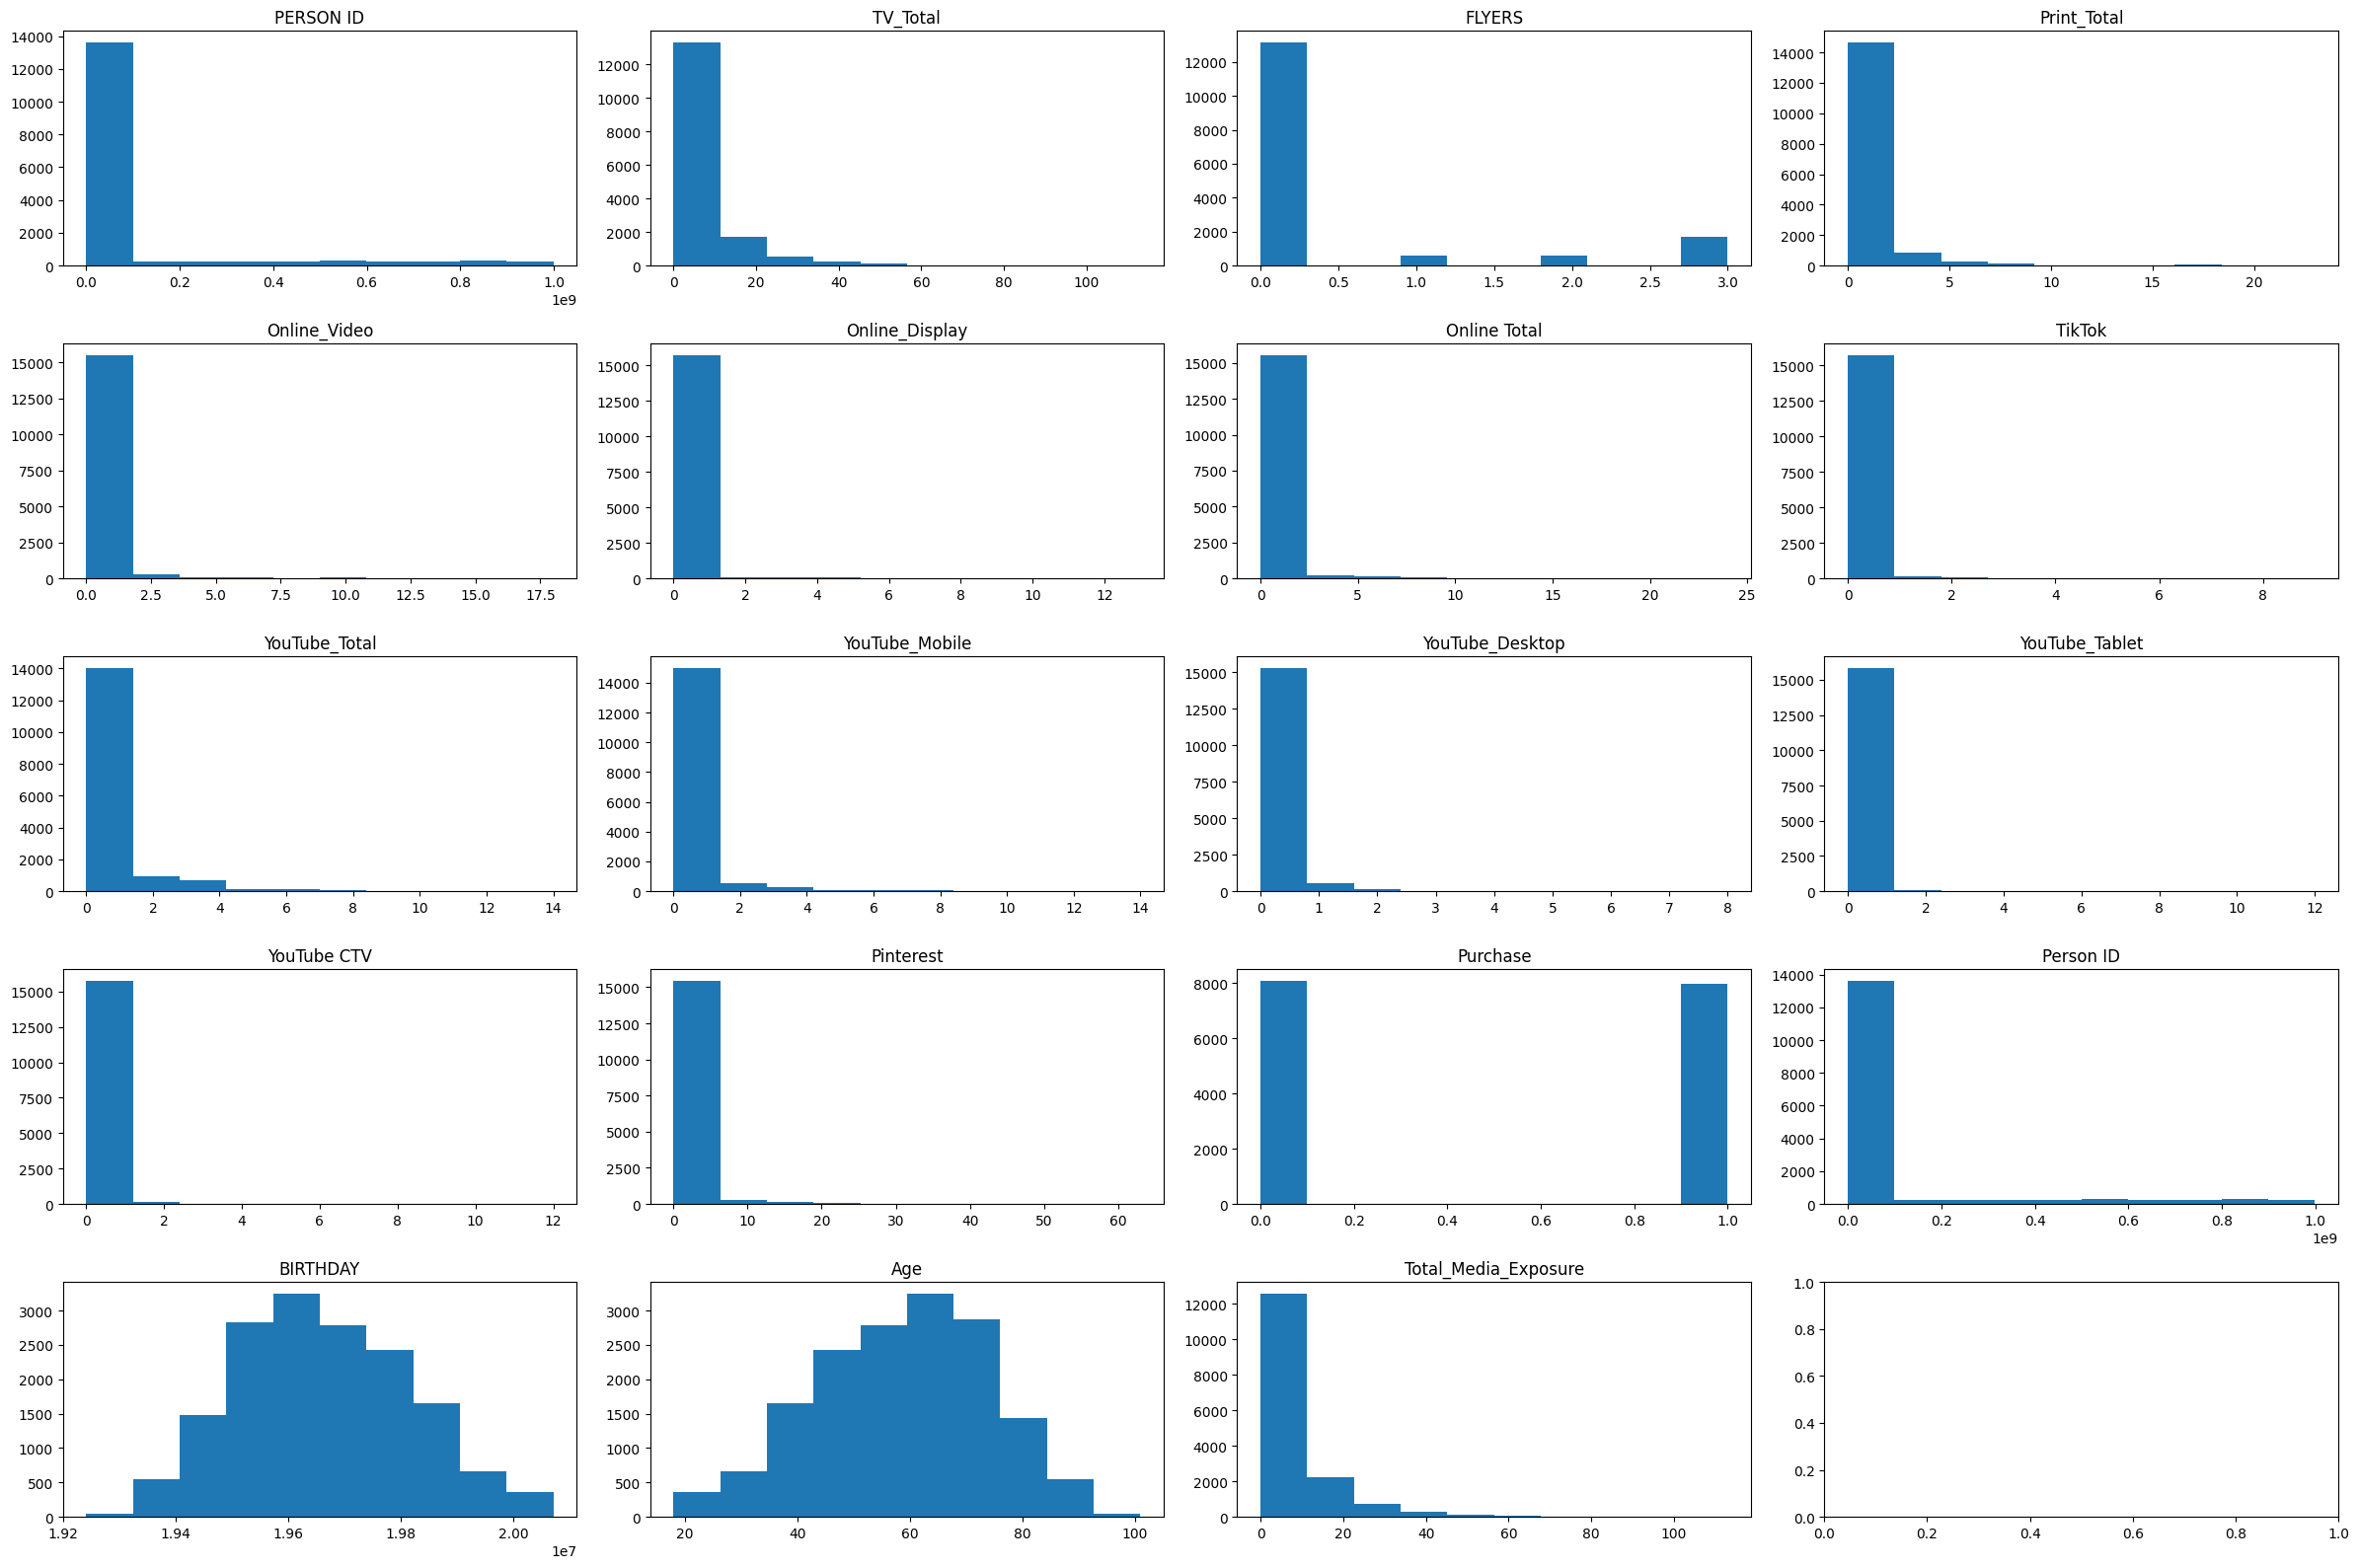

In [21]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

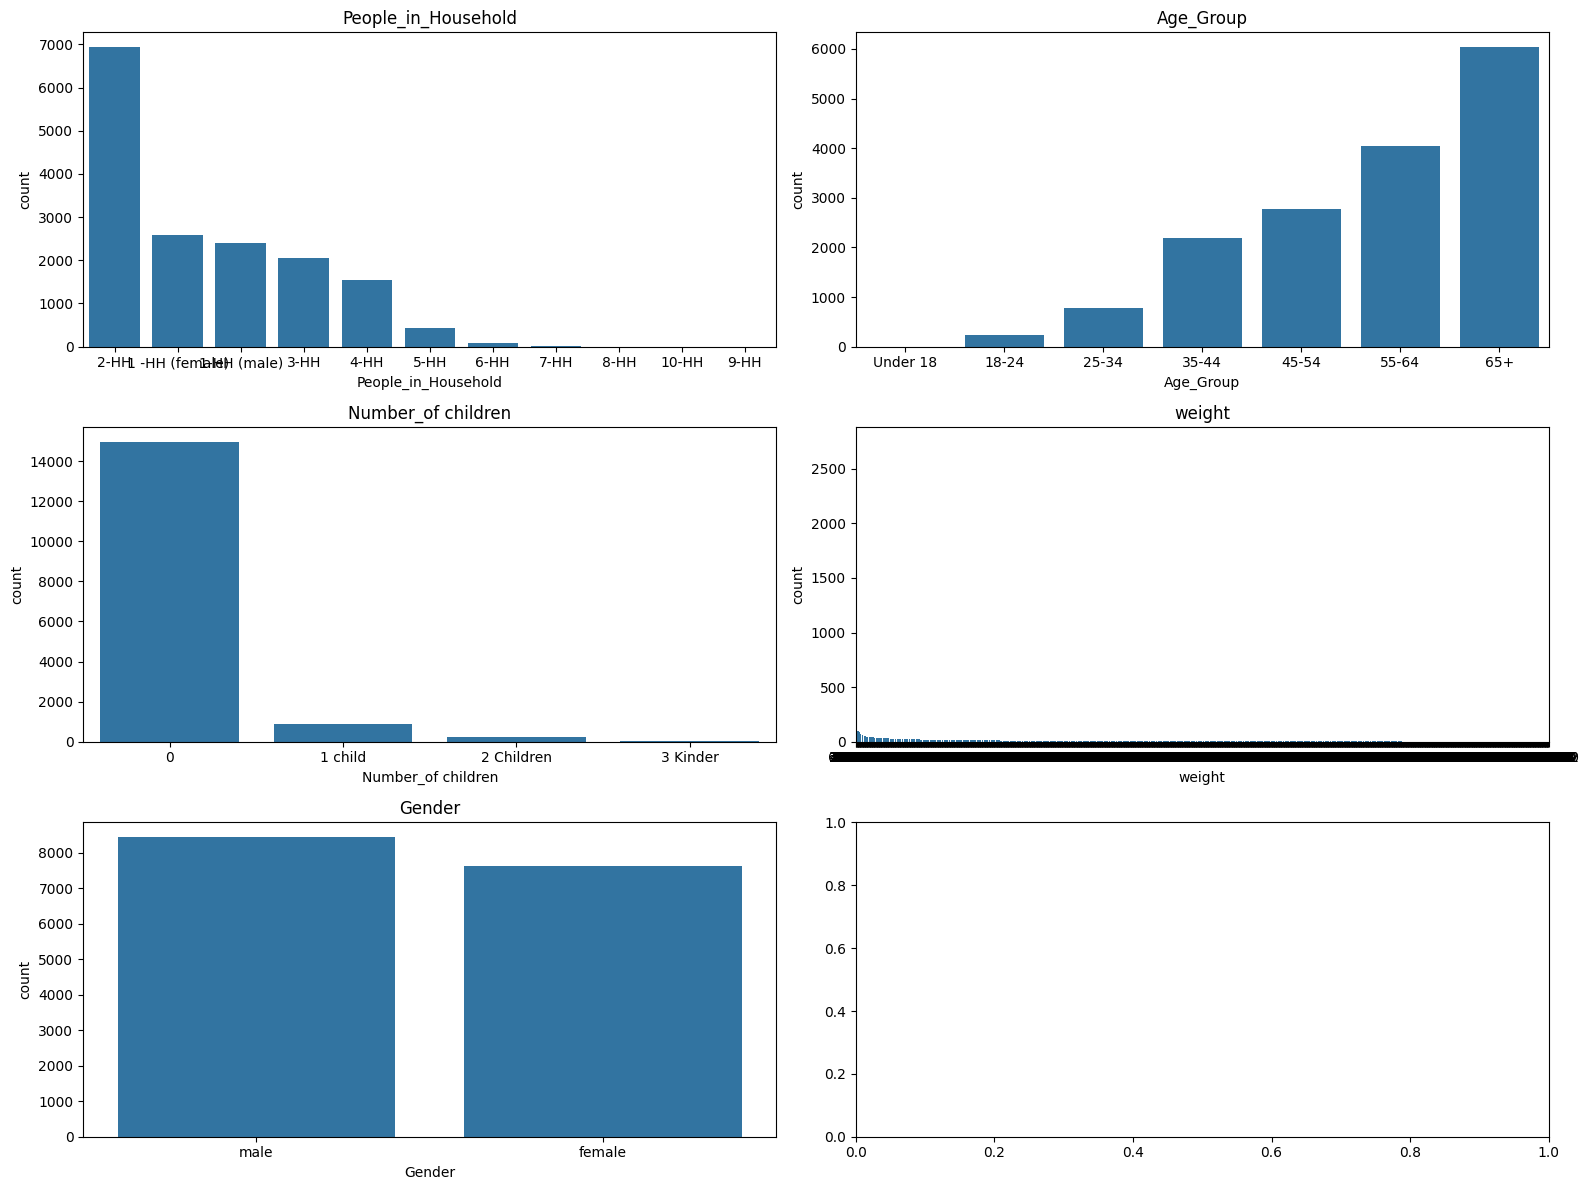

In [24]:
# Same grid of subplots as the one above but containing barplots with our categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Plot each barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts(), ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
# Prepare data
X = data[['Age', 'Gender', 'Number_of children', 'Total_Media_Exposure']]
y = data['Purchase']
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1645
           1       0.62      0.54      0.58      1565

    accuracy                           0.61      3210
   macro avg       0.62      0.61      0.61      3210
weighted avg       0.62      0.61      0.61      3210

ROC-AUC: 0.648770113714713
